# Sales Prediction - Ayaan Danish

Importing libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import HuberRegressor

Reading the data

In [49]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Understanding and Cleaning

Checking dataset rows and columns

In [50]:
df.shape

(200, 4)

Checking number of null values in each column

In [51]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Checking column types

In [52]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

Checking key statistics for the data 

In [53]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Visualization

Text(0.5, 1.0, 'Correlation Heatmap of numerical features')

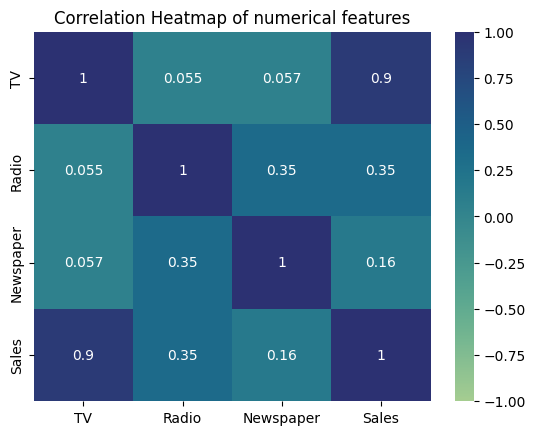

In [54]:
ax = sns.heatmap(data=df.corr(numeric_only=True), cmap='crest', annot=df.corr(numeric_only=True), vmin=-1)
ax.set_title('Correlation Heatmap of numerical features')

<Axes: title={'center': 'Sales'}, ylabel='Frequency'>

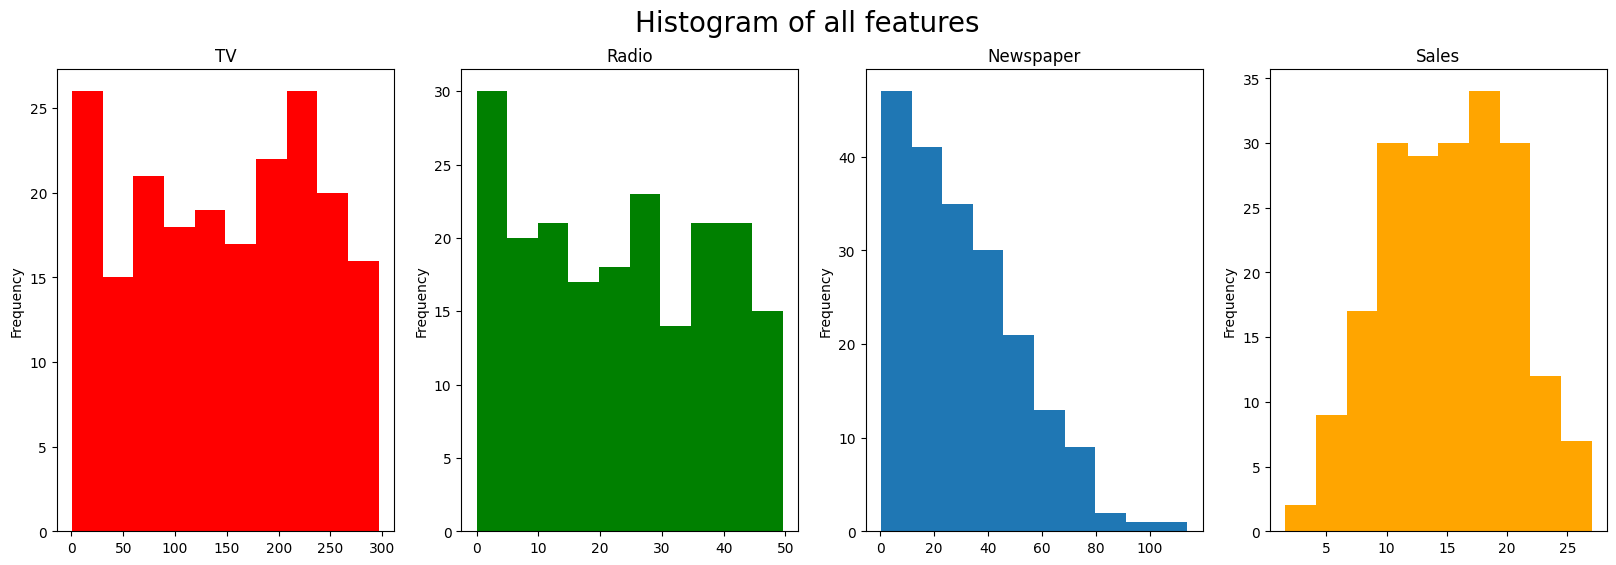

In [55]:
fig, axes = plt.subplots(1, 4, figsize=(20,6))
fig.suptitle('Histogram of all features', fontsize='20')
df['TV'].plot(kind='hist', ax=axes[0], title='TV', color='red')
df['Radio'].plot(kind='hist', ax=axes[1], title='Radio', color='green')
df['Newspaper'].plot(kind='hist', ax=axes[2], title='Newspaper')
df['Sales'].plot(kind='hist', ax=axes[3], color='orange', title='Sales')

<Axes: xlabel='Radio', ylabel='Sales'>

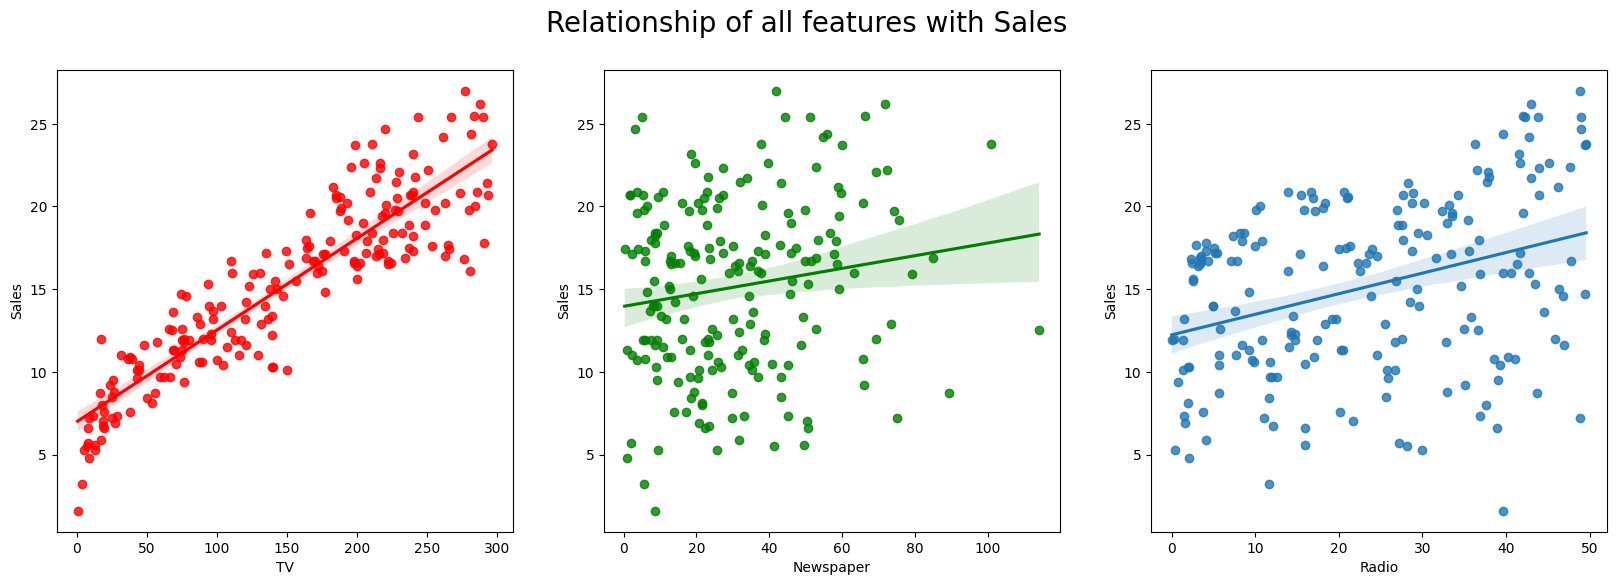

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Relationship of all features with Sales', fontsize='20')
sns.regplot(data=df, x=df['TV'], y=df['Sales'], ax=axes[0], color='red')
sns.regplot(data=df, x=df['Newspaper'], y=df['Sales'], ax=axes[1], color='green')
sns.regplot(data=df, x=df['Radio'], y=df['Sales'], ax=axes[2])

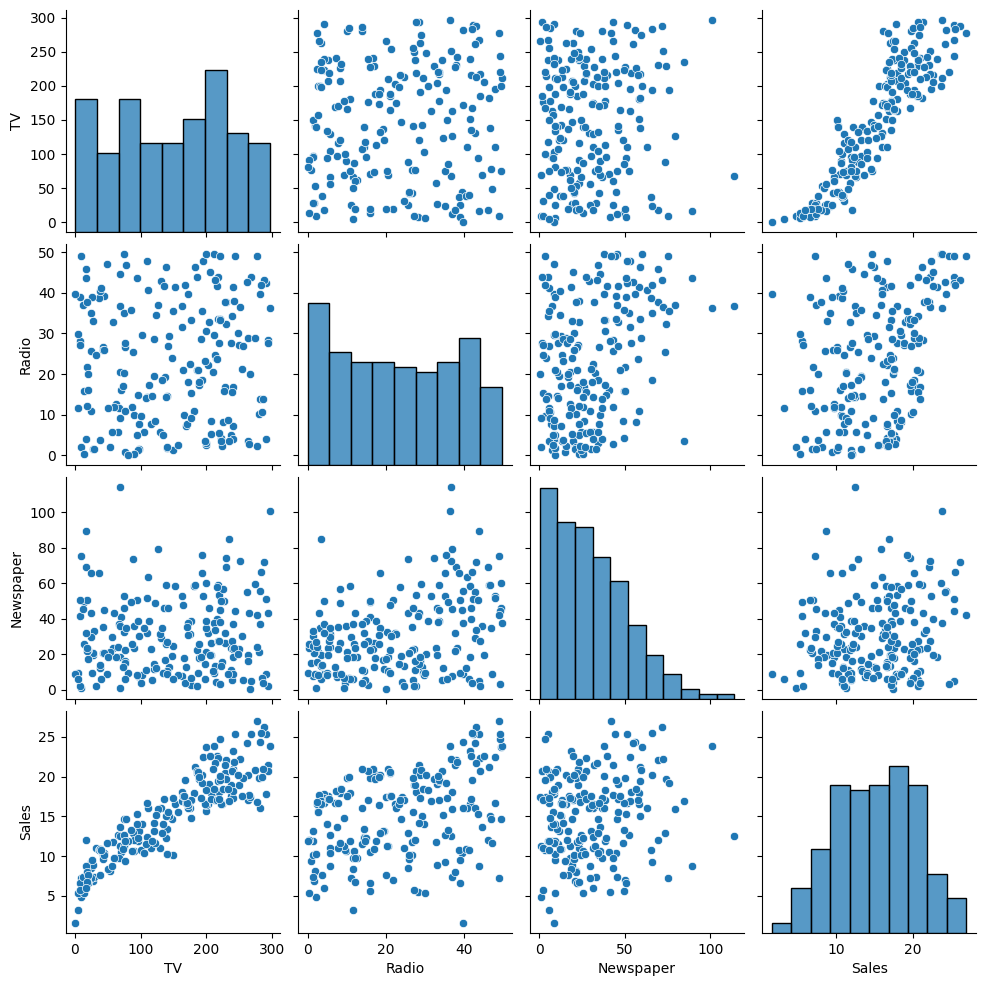

In [57]:
ax = sns.pairplot(df)

## Data Modeling

Preparing input and target features

In [58]:
X = pd.get_dummies(df.drop(columns=['Sales'], axis=1))
y = df['Sales']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Defining function to evaluate models and make table of results

In [59]:
def evaluate_regression_model(models):
    results_df = pd.DataFrame(
    columns=['Mean Squared Error', 'Mean Absolute Error', 'R-Squared Coefficient Score', 'Explained Variance Score'])

    for model, model_name in models:
        print(f"Training {model_name}...")
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        # Calculate metrics
        metrics = {
            'Model': model_name,
            'Mean Squared Error': mean_squared_error(y_test, y_pred, squared=True),
            'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
            'R-Squared Coefficient Score': r2_score(y_test, y_pred),
            'Explained Variance Score': explained_variance_score(y_test, y_pred)
        }
    
        results_df.loc[model_name] = metrics

    return results_df

Training and evaluating models

In [60]:
results_df = evaluate_regression_model([
    (LinearRegression(), 'Linear Regression'),
    (RandomForestRegressor(), 'Random Forest Regression'),
    (DecisionTreeRegressor(), 'Decision Tree Regression'),
    (Ridge(), 'Ridge Regression'),
    (Lasso(), 'Lasso Regression'),
    (ElasticNet(), 'ElasticNet Regression'),
    (GradientBoostingRegressor(), 'Gradient Boosting Regressor'),
    (SVR(), 'Support Vector Regression'),
    (KNeighborsRegressor(), 'K-Nearest Neighbors Regression'),
    (GaussianProcessRegressor(), 'Gaussian Process Regression'),
    (HuberRegressor(), 'Huber Regression'),
 ])

Training Linear Regression...
Training Random Forest Regression...
Training Decision Tree Regression...
Training Ridge Regression...
Training Lasso Regression...
Training ElasticNet Regression...
Training Gradient Boosting Regressor...
Training Support Vector Regression...
Training K-Nearest Neighbors Regression...
Training Gaussian Process Regression...
Training Huber Regression...


Model results sorted by absolute error (how far their prediction was off from the actual rating)

In [61]:
results_df.sort_values(by='Mean Absolute Error')

,Mean Squared Error,Mean Absolute Error,R-Squared Coefficient Score,Explained Variance Score
Random Forest Regression,2.439603,1.128500,0.913551,0.918037
Gradient Boosting Regressor,2.461336,1.190377,0.912781,0.915767
Lasso Regression,3.725570,1.343043,0.867982,0.871043
Huber Regression,3.784469,1.344142,0.865895,0.868049
ElasticNet Regression,3.742060,1.345448,0.867398,0.870490
Linear Regression,3.763506,1.347420,0.866638,0.869742
Ridge Regression,3.763487,1.347423,0.866638,0.869743
K-Nearest Neighbors Regression,2.722224,1.358485,0.903536,0.905391
Decision Tree Regression,4.167273,1.378788,0.852330,0.853541
Support Vector Regression,4.532389,1.662448,0.839392,0.845375
